QuantileTransformer --- 4:04 min
===

* 4:04 min | Última modificación: Octubre 7, 2021 | [YouTube](https://youtu.be/XNUSOL6VP_o)

* Esta transformación lleva a todas las características a la misma distribución deseada.

* Se logra aplicando la fórmula:

$$
G^{-1}(F(X))
$$

donde $F$ es la distribución acumulada de la características y $G^{-1}$ es la función cuartil de la distribución deseada $G$. 

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

data = penguins[["flipper_length_mm"]]
data = data.rename(columns={"flipper_length_mm": "original"})

In [2]:
from sklearn.preprocessing import QuantileTransformer

quantileTransformer_uniform = QuantileTransformer(
    # -------------------------------------------------------------------------
    # Number of quantiles to be computed
    n_quantiles=100,
    # -------------------------------------------------------------------------
    # 'uniform' / 'normal'
    output_distribution="uniform",
    # -------------------------------------------------------------------------
    # Maximum number of samples used to estimate the quantiles for
    # computational efficiency.
    subsample=100000,
    # -------------------------------------------------------------------------
    # Determines random number generation for subsampling and smoothing noise.
    random_state=None,
)
quantileTransformer_uniform.fit(data[["original"]])

data["transformed_uniform"] = quantileTransformer_uniform.transform(data[["original"]])

In [3]:
quantileTransformer_normal = QuantileTransformer(
    n_quantiles=100,
    output_distribution="normal",
)

quantileTransformer_normal.fit(data[["original"]])

data["transformed_normal"] = quantileTransformer_normal.transform(data[["original"]])

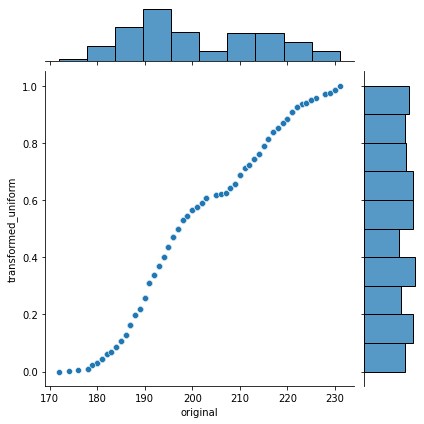

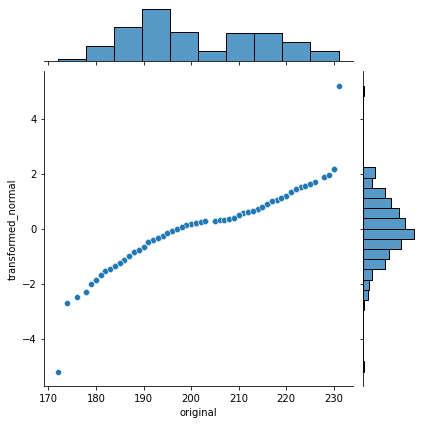

In [4]:
import matplotlib.pyplot as plt

sns.jointplot(x="original", y="transformed_uniform", data=data, kind="scatter")
sns.jointplot(x="original", y="transformed_normal", data=data, kind="scatter")
plt.show()